In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.lines

%matplotlib inline

water feature shapefile from: http://geoportal.icpac.net/layers/geonode%3Atza_water_areas_dcw
Tanzania districts shapefile from: https://geodata.lib.berkeley.edu/catalog/stanford-ts107jn3602

In [2]:
X = pd.read_csv('../../../data/data.csv', index_col='id')
y = pd.read_csv('../../../data/status.csv')

In [3]:
X.shape, y.shape

((59400, 39), (59400, 2))

In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [5]:
full_df = pd.concat([X, y], axis=1)
full_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,0.0,2012-11-13,Tasaf,0.0,TASAF,33.125828,-5.118154,Mratibu,0.0,Lake Tanganyika,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,69572.0,functional
1,0.0,2011-03-05,Shipo,1978.0,SHIPO,34.770717,-9.395642,none,0.0,Rufiji,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,8776.0,functional
2,0.0,2011-03-27,Lvia,0.0,LVIA,36.115056,-6.279268,Bombani,0.0,Wami / Ruvu,...,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,34310.0,functional
3,10.0,2013-06-03,Germany Republi,1639.0,CES,37.147432,-3.187555,Area 7 Namba 5,0.0,Pangani,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,67743.0,non functional
4,0.0,2011-03-22,Cmsr,0.0,CMSR,36.164893,-6.099289,Ezeleda,0.0,Wami / Ruvu,...,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,19728.0,functional


In [6]:
full_df['status_group'] = full_df['status_group'].apply(lambda x: 'non functional' if (x=='functional needs repair') | (x=='non functional')
                                                        else 'functional')

In [7]:
full_df['status_group'].value_counts()

functional        44167
non functional    27141
Name: status_group, dtype: int64

In [8]:
full_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,0.0,2012-11-13,Tasaf,0.0,TASAF,33.125828,-5.118154,Mratibu,0.0,Lake Tanganyika,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,69572.0,functional
1,0.0,2011-03-05,Shipo,1978.0,SHIPO,34.770717,-9.395642,none,0.0,Rufiji,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,8776.0,functional
2,0.0,2011-03-27,Lvia,0.0,LVIA,36.115056,-6.279268,Bombani,0.0,Wami / Ruvu,...,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,34310.0,functional
3,10.0,2013-06-03,Germany Republi,1639.0,CES,37.147432,-3.187555,Area 7 Namba 5,0.0,Pangani,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,67743.0,non functional
4,0.0,2011-03-22,Cmsr,0.0,CMSR,36.164893,-6.099289,Ezeleda,0.0,Wami / Ruvu,...,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,19728.0,functional


In [9]:
full_df['longitude'].value_counts()

0.000000     1812
32.955597       2
36.802490       2
32.936689       2
39.105307       2
             ... 
38.170481       1
37.641418       1
32.288206       1
35.666819       1
35.432998       1
Name: longitude, Length: 57516, dtype: int64

In [10]:

full_gdf = gpd.GeoDataFrame(
   full_df, geometry= gpd.points_from_xy(full_df.longitude, full_df.latitude))

full_gdf.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,geometry
0,0.0,2012-11-13,Tasaf,0.0,TASAF,33.125828,-5.118154,Mratibu,0.0,Lake Tanganyika,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,69572.0,functional,POINT (33.12583 -5.11815)
1,0.0,2011-03-05,Shipo,1978.0,SHIPO,34.770717,-9.395642,none,0.0,Rufiji,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,8776.0,functional,POINT (34.77072 -9.39564)
2,0.0,2011-03-27,Lvia,0.0,LVIA,36.115056,-6.279268,Bombani,0.0,Wami / Ruvu,...,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,34310.0,functional,POINT (36.11506 -6.27927)
3,10.0,2013-06-03,Germany Republi,1639.0,CES,37.147432,-3.187555,Area 7 Namba 5,0.0,Pangani,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,67743.0,non functional,POINT (37.14743 -3.18755)
4,0.0,2011-03-22,Cmsr,0.0,CMSR,36.164893,-6.099289,Ezeleda,0.0,Wami / Ruvu,...,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,19728.0,functional,POINT (36.16489 -6.09929)


In [11]:
full_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 71308 entries, 0 to 74247
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             59400 non-null  float64 
 1   date_recorded          59400 non-null  object  
 2   funder                 55765 non-null  object  
 3   gps_height             59400 non-null  float64 
 4   installer              55745 non-null  object  
 5   longitude              59400 non-null  float64 
 6   latitude               59400 non-null  float64 
 7   wpt_name               59400 non-null  object  
 8   num_private            59400 non-null  float64 
 9   basin                  59400 non-null  object  
 10  subvillage             59029 non-null  object  
 11  region                 59400 non-null  object  
 12  region_code            59400 non-null  float64 
 13  district_code          59400 non-null  float64 
 14  lga                    59400 n

In [12]:
full_gdf = full_gdf[full_gdf['longitude']!= 0]
full_gdf['longitude'].value_counts()

39.091785    2
33.010510    2
39.103950    2
37.318911    2
37.269036    2
            ..
38.170481    1
37.641418    1
32.288206    1
35.666819    1
35.432998    1
Name: longitude, Length: 57515, dtype: int64

In [13]:
tanzania_lakes = gpd.read_file('GISdata/tza_water_areas_dcw.shp')

In [14]:
tanzania = gpd.read_file('GISdata/tanzania_shapefile/stanford-ts107jn3602-geojson.json')


In [15]:
tanzania.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
full_gdf.set_crs(epsg=4326, inplace=True)
full_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
tanzania_lakes.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
tanzania_lakes.to_crs(epsg=4326, inplace=True)
tanzania_lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
full_gdf['status_group'].value_counts()

functional        43012
non functional    26484
Name: status_group, dtype: int64

In [20]:
full_gdf.geometry


0         POINT (33.12583 -5.11815)
1         POINT (34.77072 -9.39564)
2         POINT (36.11506 -6.27927)
3         POINT (37.14743 -3.18755)
4         POINT (36.16489 -6.09929)
                    ...            
74240     POINT (37.00773 -3.28087)
74242     POINT (33.72499 -8.94076)
74243     POINT (33.96354 -1.42948)
74246     POINT (35.63048 -7.71055)
74247    POINT (35.43300 -10.63927)
Name: geometry, Length: 69496, dtype: geometry

In [ ]:
# next two cells are an attempt to set colors for categoiries by creating a new column in the gdf from an array based of 
# status group values - array gives a specific color for each value...
# colors = np.where(full_gdf["status_group"]=='functional','b','r')
# colors[:50]

In [21]:
dir(full_gdf['geometry'])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd_

In [22]:
well_palette = {'functional': '#489c9c',
               'non functional': '#c71585'}

In [23]:
full_gdf.shape

(69496, 42)

In [24]:
full_gdf['status_group'].describe()

count          69496
unique             2
top       functional
freq           43012
Name: status_group, dtype: object

In [25]:
full_gdf.loc[full_gdf['status_group'] == 'non functional']

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

In [26]:
full_gdf[full_gdf.status_group == 'non functional'] #.plot(ax=ax, categorical = True,legend= True, markersize=1, color='#c71585')


GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

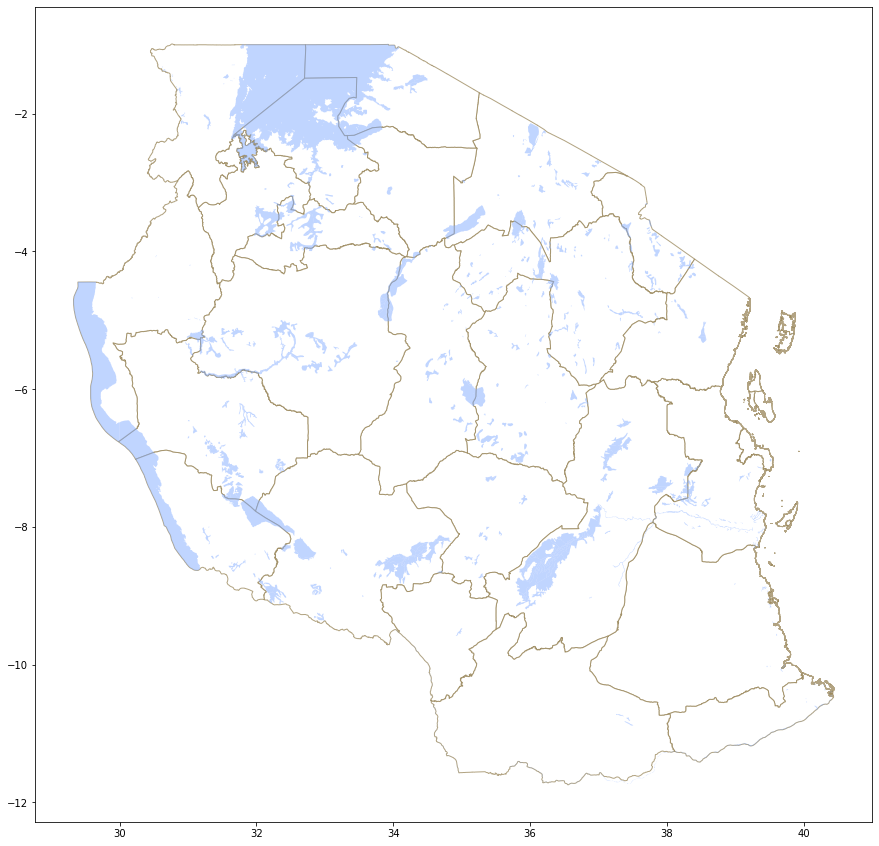

In [27]:
from matplotlib.lines import Line2D  # for legend handle


ax = tanzania.plot(color='white', edgecolor='#988558', alpha =.75, figsize = (15,15))

tanzania_lakes.plot(ax=ax, color='#83acff', alpha = .5)


full_gdf[full_gdf.status_group == 'functional'].plot(ax=ax, categorical = True, legend= True, markersize=1, color='#489c9c', alpha=.6)

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in well_palette.items()]
# ax.legend(frameon=False, handles=handles, bbox_to_anchor=(0,.15), loc='upper left', prop={'size': 15})

ax.set_axis_off()
plt.savefig('Tanzania_pumps.png')

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

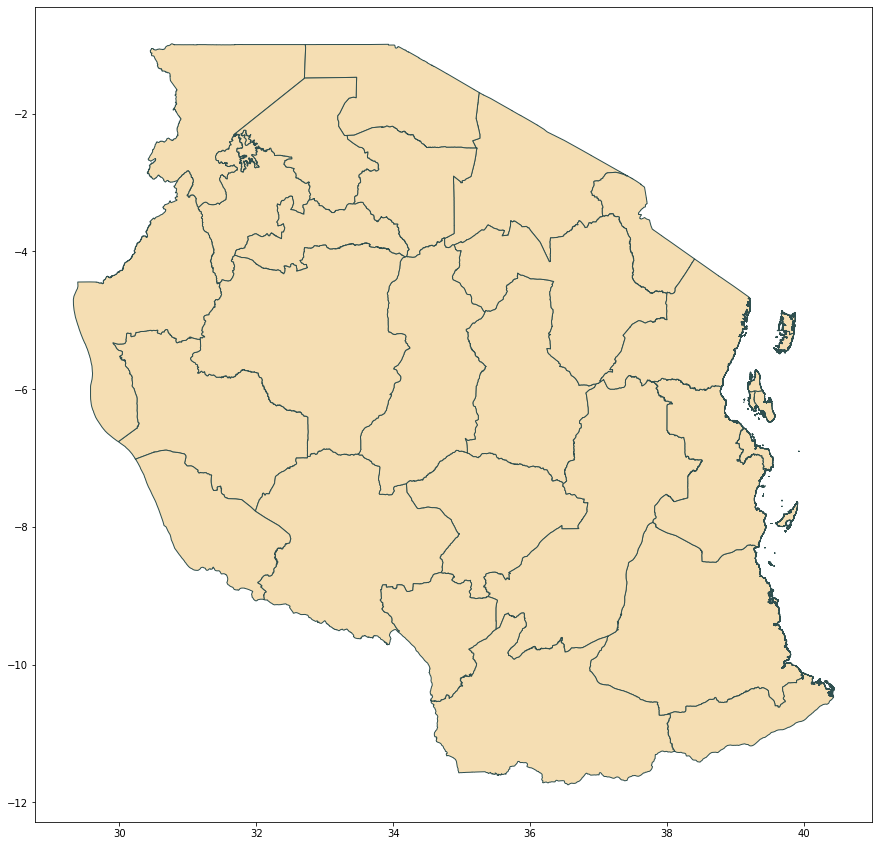

In [28]:
from matplotlib.lines import Line2D  # for legend handle

fig, ax = plt.subplots(figsize=(15,15))

tanzania.plot(color='wheat', edgecolor='darkslategrey', ax=ax)

full_gdf.plot(column='status_group',
              c = full_gdf['status_group'].map(well_palette),
                categorical=True,
                legend=True,
                ax=ax)


# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in well_palette.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()
# Adjust legend location
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.15,0.5))
# plt.legend(['simple legend example']) 
# pop_a = mpatches.Patch(color='#5DC83F', label='Population Dataset 1')
# pop_b = mpatches.Patch(color='#CE5D45', label='Population Dataset 2')
# plt.legend(handles=[pop_a,pop_b])
  
ax.set_axis_off()

plt.show()

In [ ]:

# full_gdf.to_file('GISdata/X_y_train_gdf.shp')